**ICS 5110 Assignment -- FEATURES / LABELS analysis**

DATASET --> POLICE PRESS RELEASES -- EXTRACTED FEEATURES / LABELS


---



In [1]:
import pandas as pd

csv_file_path = 'combined_press_releases_final.csv'

# Read the CSV file into a pandas DataFrame
df= pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame loaded from CSV:")
print(df.head())

First 5 rows of the DataFrame loaded from CSV:
   release_id                                           og_title  \
0           1  Collision between a car and a motorbike in Żur...   
1           1  Collision between a car and a motorbike in Żur...   
2           2                    Car-motorcycle traffic accident   
3           2                    Car-motorcycle traffic accident   
4           3              Car-motorcycle collision in Ħal Qormi   

                                          og_content og_date_published  \
0  Today, at around 0930hrs, the Police were info...        2025-10-09   
1  Today, at around 0930hrs, the Police were info...        2025-10-09   
2  Yesterday, at around 1830hrs, the Police were ...        2025-06-20   
3  Yesterday, at around 1830hrs, the Police were ...        2025-06-20   
4  Today, at around 0800hrs, the Police were info...        2025-05-12   

  accident_datetime  is_accident                 street     city  \
0  09/10/2025 09:30         Tru

In [2]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['release_id', 'number_injured']


In [3]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['og_title', 'og_content', 'og_date_published', 'accident_datetime', 'street', 'city', 'accident_severity', 'vehicle_type', 'driver_age', 'driver_gender']


In [4]:
print("Descriptive statistics for numerical columns:")
print(df[numerical_cols].describe())

Descriptive statistics for numerical columns:
       release_id  number_injured
count  191.000000      191.000000
mean    77.701571        0.821990
std    122.997860        0.820615
min      1.000000        0.000000
25%     29.500000        0.000000
50%     58.000000        1.000000
75%     85.000000        1.000000
max    890.000000        9.000000


In [5]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Top 5 most common values:")
    print(df[col].value_counts().head(5))


Column: og_title
Number of unique values: 79
Top 5 most common values:
og_title
Man grievously injured in traffic accident       10
Persons injured in separate traffic accidents    10
Woman grievously injured in traffic accident      8
Naxxar traffic accident                           7
Traffic accident in Gudja                         5
Name: count, dtype: int64

Column: og_content
Number of unique values: 111
Top 5 most common values:
og_content
Three people were taken to Mater Dei Hospital after being injured in two separate traffic accidents yesterday.The first accident occurred at around 1415hrs, in Triq il-Marfa, Mellieħa. Preliminary investigations showed that a 50-year-old woman residing in Rabat, Gozo, lost control of the Toyota Ractis she was driving and crashed into an electricity pole. The woman was accompanied by a 29-year-old man who lives in Rabat, Gozo.The second incident happened at around 2345hrs, in Triq il-Kappillan Mifsud, Ħamrun. Preliminary investigations showed

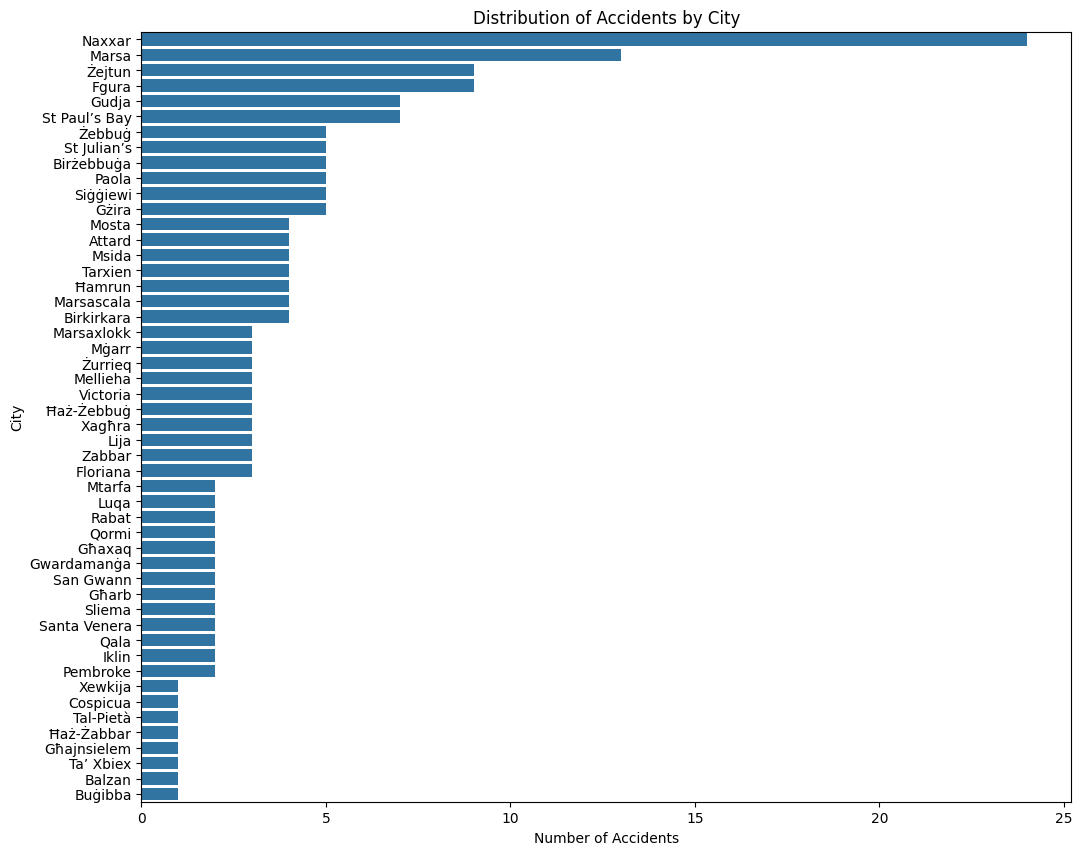

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.countplot(data=df, y='city', order=df['city'].value_counts().index)
plt.title("Distribution of Accidents by City")
plt.xlabel("Number of Accidents")
plt.ylabel("City")
plt.show()

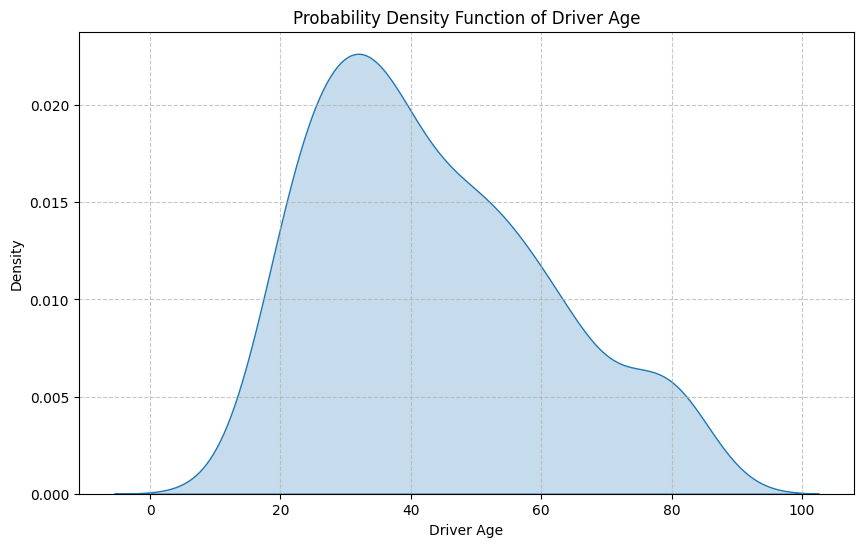

In [7]:
import numpy as np

# Convert 'driver_age' to numeric, coercing errors to NaN
df['driver_age_numeric'] = pd.to_numeric(df['driver_age'], errors='coerce')

# Drop NaN values for plotting if any were introduced during conversion
age_data = df['driver_age_numeric'].dropna()

# Check if there's enough data to plot after conversion and dropping NaNs
if not age_data.empty:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(age_data, fill=True)
    plt.title("Probability Density Function of Driver Age")
    plt.xlabel("Driver Age")
    plt.ylabel("Density")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not plot PDF: 'driver_age' column is empty or contains no numeric data after cleaning.")

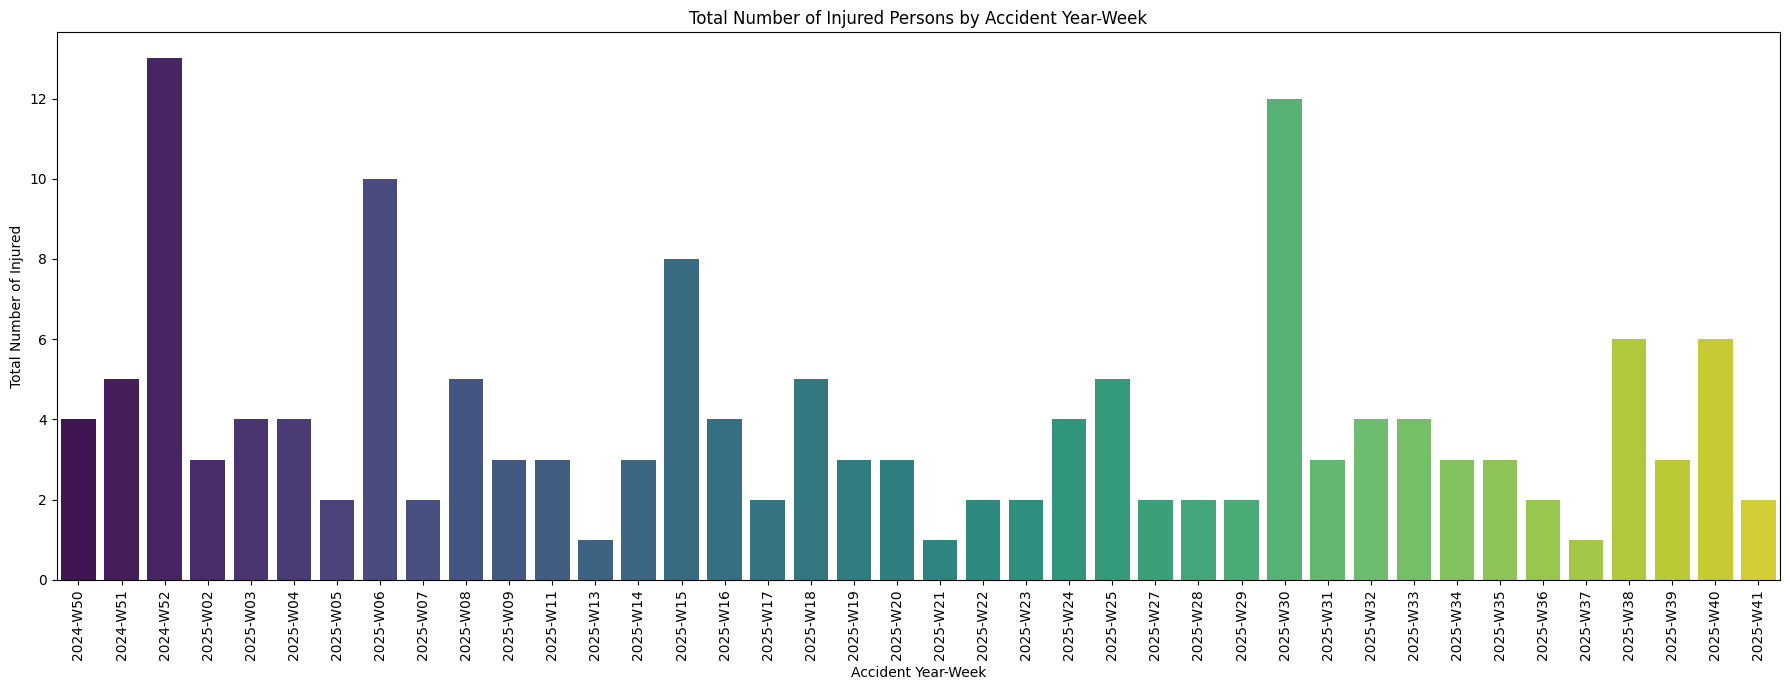

In [8]:
# Convert 'accident_datetime' to datetime objects, coercing errors to NaT
df['accident_date'] = pd.to_datetime(df['accident_datetime'], format='%d/%m/%Y %H:%M', errors='coerce')

# Drop rows where 'accident_date' is NaT (i.e., invalid date format)
df_cleaned = df.dropna(subset=['accident_date']).copy()

# Extract year and week number from the accident date
df_cleaned['accident_year'] = df_cleaned['accident_date'].dt.year
df_cleaned['accident_week'] = df_cleaned['accident_date'].dt.isocalendar().week

# Create a combined 'year-week' string for better x-axis labeling
df_cleaned['year_week'] = df_cleaned['accident_year'].astype(str) + '-W' + df_cleaned['accident_week'].astype(str).str.zfill(2)

# Group by combined 'year_week' and sum the 'number_injured'
weekly_injured = df_cleaned.groupby('year_week')['number_injured'].sum().reset_index()

# Ensure the data is sorted by 'year_week' for proper time series plotting
weekly_injured = weekly_injured.sort_values(by='year_week')

# Plotting the time series bar graph by year-week
plt.figure(figsize=(18, 7)) # Increased figure width for better readability of x-axis labels
sns.barplot(x='year_week', y='number_injured', data=weekly_injured, palette='viridis', hue='year_week', legend=False)
plt.title('Total Number of Injured Persons by Accident Year-Week')
plt.xlabel('Accident Year-Week')
plt.ylabel('Total Number of Injured')
plt.xticks(rotation=90, ha='center') # Rotate labels for better readability
plt.tight_layout()
plt.show()

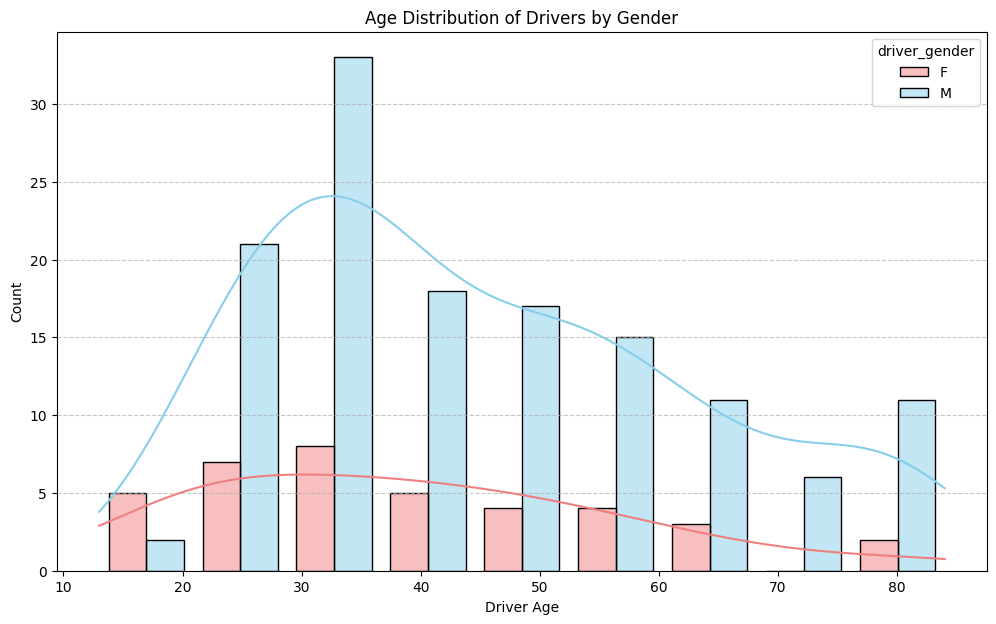

In [9]:
# Filter out 'unknown' gender and drop NaN values from driver_age_numeric
df_filtered_gender = df_cleaned[df_cleaned['driver_gender'].isin(['M', 'F'])].dropna(subset=['driver_age_numeric'])

plt.figure(figsize=(12, 7))
sns.histplot(
    data=df_filtered_gender,
    x='driver_age_numeric',
    hue='driver_gender',
    multiple='dodge',
    shrink=0.8, # Adjust bar width to prevent overlap
    kde=True, # Add a Kernel Density Estimate to show the distribution shape
    palette={'M': 'skyblue', 'F': 'lightcoral'}
)

plt.title('Age Distribution of Drivers by Gender')
plt.xlabel('Driver Age')
plt.ylabel('Count')
# The legend will be automatically generated by seaborn due to the 'hue' parameter.
# Removed explicit plt.legend() call to avoid UserWarning.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

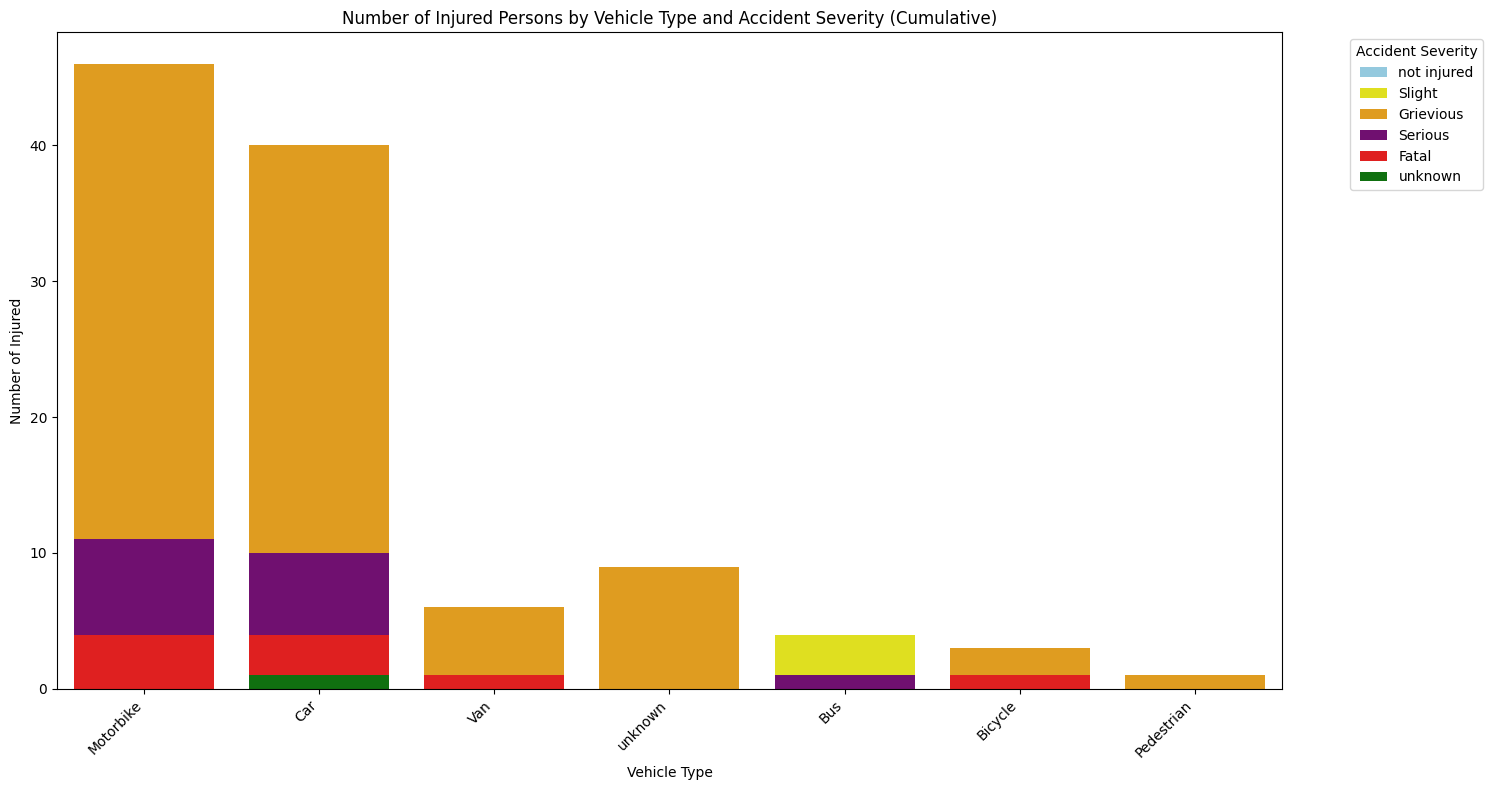

In [10]:
# Group by vehicle_type AND accident_severity and sum the number_injured
injured_by_vehicle_severity = df_cleaned.groupby(['vehicle_type', 'accident_severity'])['number_injured'].sum().reset_index()

# Calculate total injured per vehicle type for sorting the bars
total_injured_per_vehicle = injured_by_vehicle_severity.groupby('vehicle_type')['number_injured'].sum().sort_values(ascending=False).index

# Define a custom color palette for all severity levels
custom_palette = {
    'Fatal': 'red',
    'Serious': 'purple',
    'Grievious': 'orange',
    'Slight': 'yellow',
    'not injured': 'skyblue',
    'unknown': 'green'
}

# Define a custom order for severity levels for stacking (e.g., most severe at the bottom)
severity_order = ['not injured', 'Slight', 'Grievious', 'Serious', 'Fatal', 'unknown'] # Reordered for better stacking visual

# Create the bar chart with hue for accident_severity and custom palette
plt.figure(figsize=(15, 8)) # Adjusted figure size for more categories
sns.barplot(x='vehicle_type', y='number_injured', hue='accident_severity',
            data=injured_by_vehicle_severity, palette=custom_palette, dodge=False,
            order=total_injured_per_vehicle, hue_order=severity_order) # Use dodge=False for stacked bars

plt.title('Number of Injured Persons by Vehicle Type and Accident Severity (Cumulative)')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Injured')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout()
plt.show()

In [11]:
injured_by_street = df_cleaned.groupby('street')['number_injured'].sum().reset_index()
pareto_data = injured_by_street.sort_values(by='number_injured', ascending=False)
pareto_data['cumulative_injured'] = pareto_data['number_injured'].cumsum()
total_injured = pareto_data['number_injured'].sum()
pareto_data['cumulative_percentage'] = (pareto_data['cumulative_injured'] / total_injured) * 100

print("Prepared data for Pareto Chart:")
print(pareto_data.head())

Prepared data for Pareto Chart:
             street  number_injured  cumulative_injured  cumulative_percentage
4        Coast Road              10                  10               6.410256
27  St James Square               9                  19              12.179487
18       Mosta Road               4                  23              14.743590
13  Hompesch Street               4                  27              17.307692
49    Triq L-Imdina               4                  31              19.871795


/tmp/ipython-input-1918003906.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pareto_data['street'], rotation=90, ha='center')


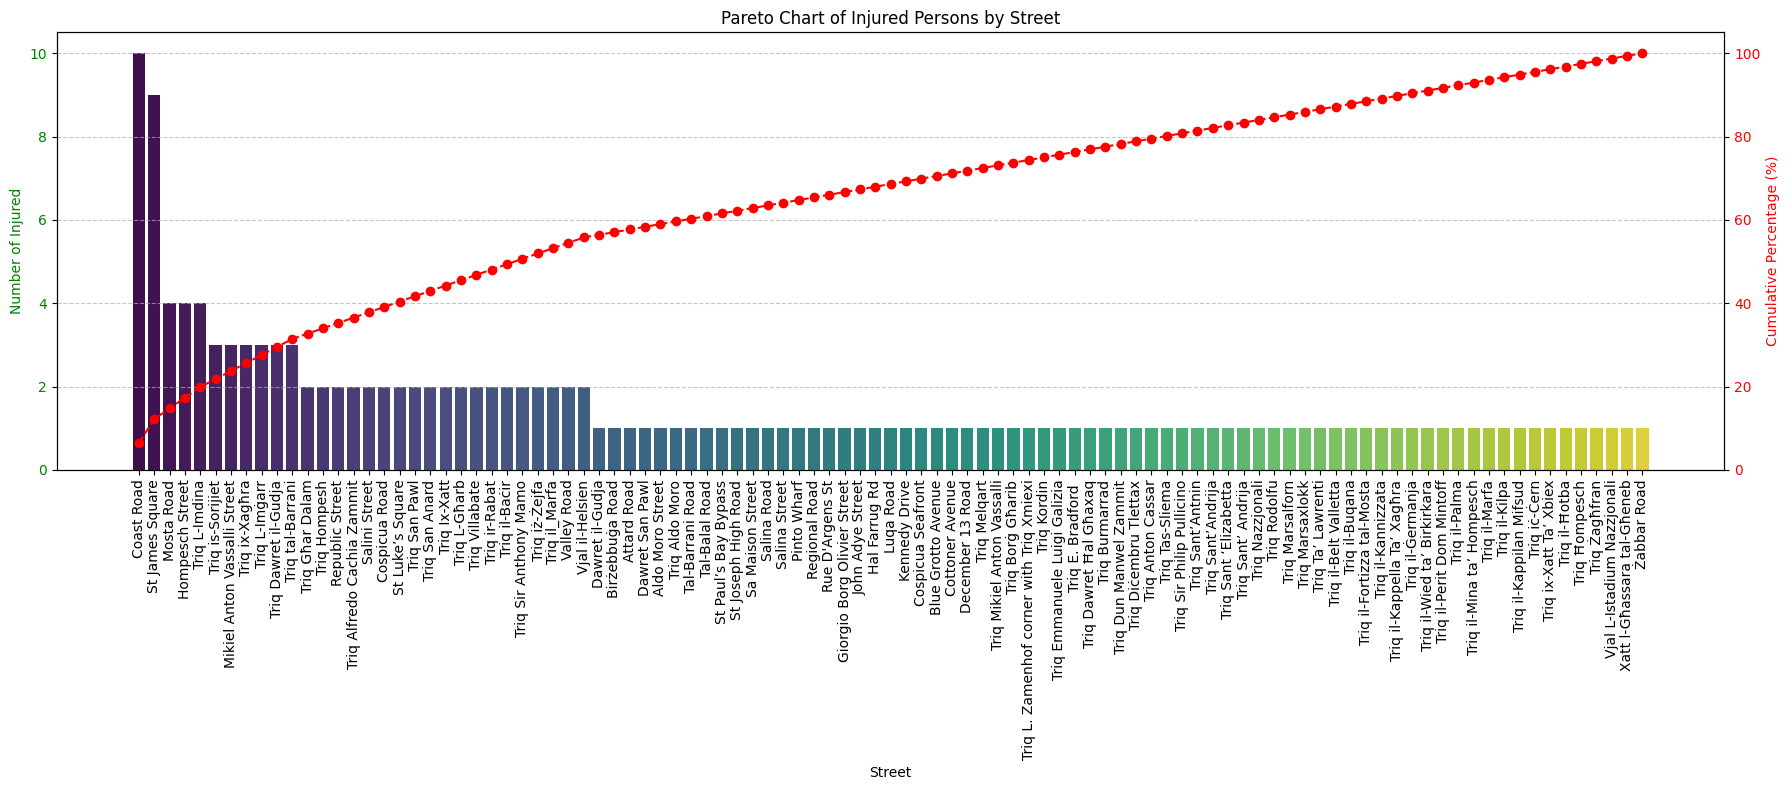

In [12]:
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot bars for number of injured persons
sns.barplot(x='street', y='number_injured', data=pareto_data, palette='viridis', ax=ax1, hue='street', legend=False)
ax1.set_xlabel('Street')
ax1.set_ylabel('Number of Injured', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_xticklabels(pareto_data['street'], rotation=90, ha='center')

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(pareto_data['street'], pareto_data['cumulative_percentage'], color='r', marker='o', linestyle='--')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 105) # Set y-axis limit for percentage

# Add title and grid
plt.title('Pareto Chart of Injured Persons by Street')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()